# BMEN 509 - Lab 1

#### Name:
Ibrahim Asad
#### UCID: 
30088413

## Notebook Setup

### Objectives of this lab
1. Understand the imaging basics  
2. Representing images  
    a. Different sensors for imaging (different modalities)
    b. Continuous to discrete domain
3. Image Operations
    a.Histograms and Convolutions

### Section 3 - Image Basics

In [1]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [2]:
# Constants
data_directory = os.path.join('.', 'Data')
file_names = [
    'BreastUltrasound5.tif', 'T1Weighted8.jpg',
    'Thorax_PD.png', 'calcs_grids.tiff',
    'knee_ct2.tif', 'knee_xray2.tif',
    'mri_T2.tif', 'mri_brain.tif',
    'mri_pd.tif'
]

In [3]:
# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!


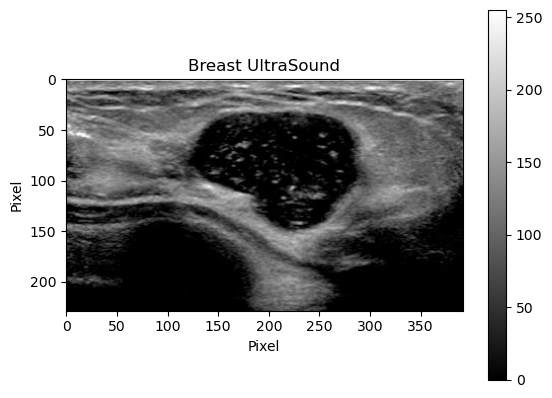

The X and Y Values of the image is: (X,Y), (229, 392)
The following Image has:
89768 pixels

Pixel at (0, 0) is in the top left corner of the image


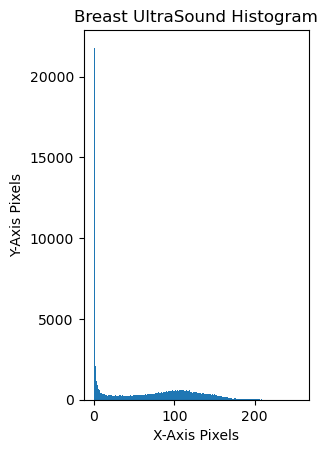

In [4]:
# Loading Image
filename = os.path.join(data_directory, 'BreastUltrasound5.tif')

I = io.imread(filename)

# Display Image
plt.imshow(I, cmap='gray')
# Title, Axis, and Color Bar Added
plt.title("Breast UltraSound")
plt.colorbar(); plt.xlabel('Pixel'); plt.ylabel('Pixel')
plt.show()

#Size of X and Y Dimensions
print('The X and Y Values of the image is: (X,Y), {}'.format(I.shape))

# Let's the properties!
# Pixels
print('The following Image has:')
print('{} pixels\n'.format(np.prod(I.shape)))
print('Pixel at (0, 0) is in the top left corner of the image')


# Histogram with 256 bins
plt.subplot(1, 2, 2); plt.hist(I.ravel(), bins=256); plt.xlabel('X-Axis Pixels'); plt.ylabel('Y-Axis Pixels'); plt.title("Breast UltraSound Histogram")
plt.show()

### Section 4 - Transfer Function


Reading image ./Data/mri_pd.tif


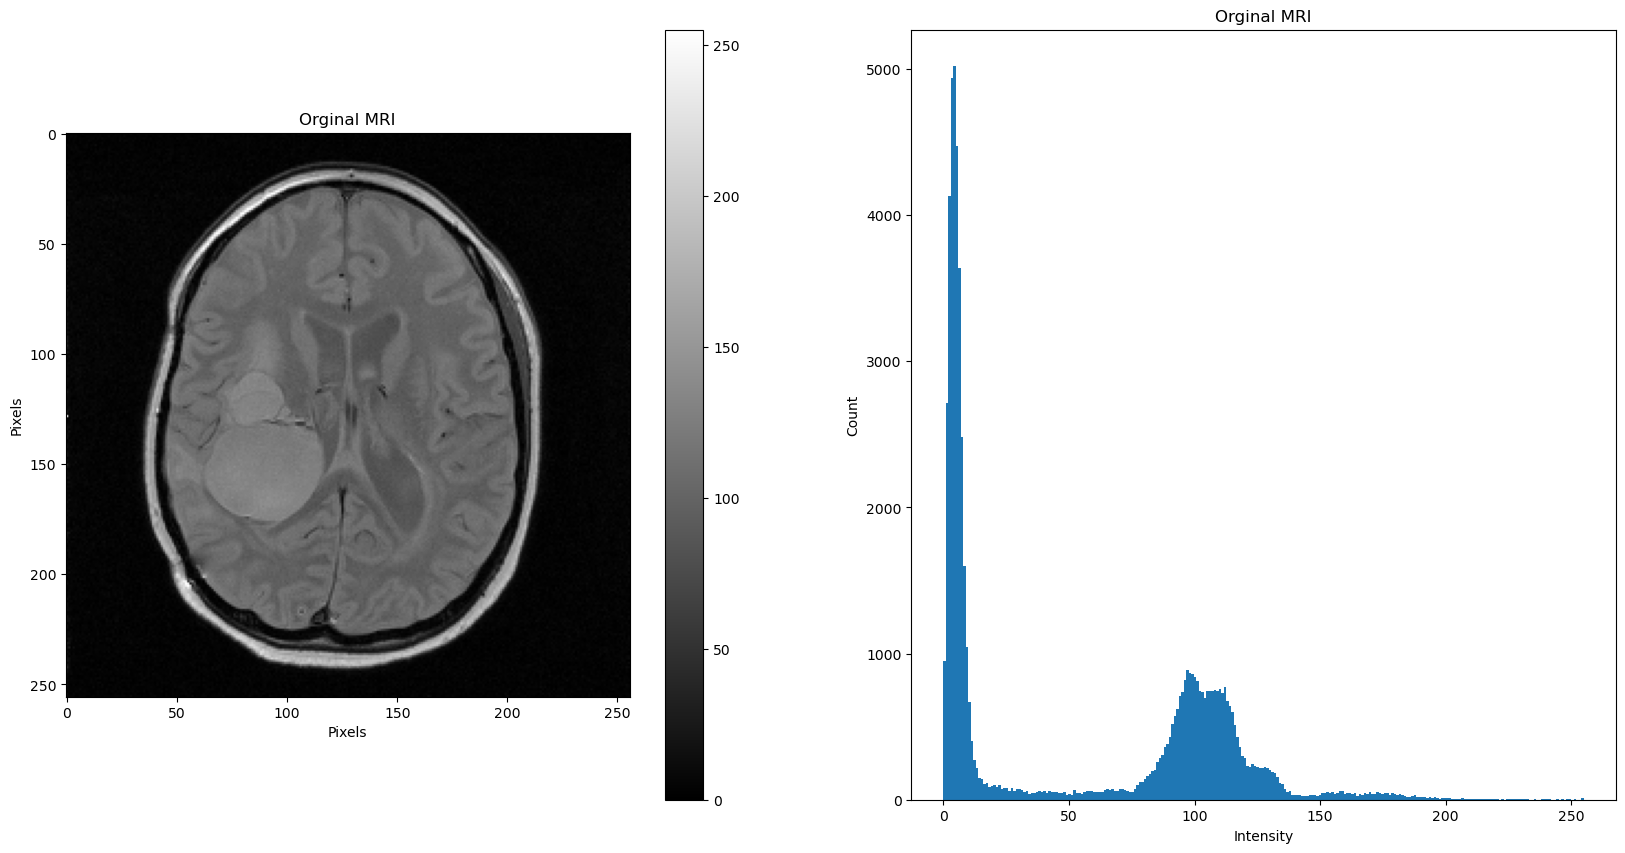

Reading image ./Data/mri_pd.tif


In [5]:
filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)

#Original 
plt.subplots(1, 2, figsize=(20,10))
plt.subplot(1, 2, 1); plt.imshow(I, cmap='gray'); plt.colorbar(); plt.title('Orginal MRI'); plt.xlabel('Pixels'); plt.ylabel('Pixels')
plt.subplot(1, 2, 2); plt.hist(I.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count'); plt.title('Orginal MRI')
plt.show()

filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))

I = io.imread(filename)
J = io.imread(filename)
J = J.astype(np.float32)

#Linear Transformation Function
# J(x, y) = m · I(x, y) + b
# We Need Max and Min as they are the Visual Points That we need for the m and b values

def max(Window, Level):
    temp = Level+(0.5*Window)
    return temp

def min(Window, Level):
    temp =Level-(0.5*Window)
    return temp

def mvalue(Window, Max, Min):
    m = (Max - Min) / Window
    return m

def bvalue(Window, Max, Min):
    subtract_value = (Max - Min) / Window
    subtract_value = subtract_value * Max 
    b = Max - subtract_value
    return b

size = (4,3)
def Linear_transform(Window, Level, Ixy):
    K = Ixy
    MIN = np.min(J[:])
    MAX = np.max(J[:])
    m = mvalue(Window, MAX, MIN)
    b = bvalue(Window, MAX, MIN)
    function = m * K
    function = function  + b
    x = np.linspace(MIN, MAX, 1000)
    y = function

    return function

# Used to Plot the Transformations

def Plot_Line_Transform(Ixy, name, count, function):
    MIN = np.min(Ixy[:])
    MAX = np.max(Ixy[:])
    #Change Figure Size
    plt.figure(figsize=(30,30))
    # Plot Image
    plt.subplot(size[0], size[1], 3*(count-1)+1)
    plt.imshow(K, cmap='gray', vmin=MIN, vmax=MAX)
    plt.colorbar()
    plt.title(name)
    
    # Plot histogram
    plt.subplot(size[0], size[1], 3*(count-1)+1+2)
    plt.hist(K.ravel(), bins=256)
    plt.ylabel('Count') 
    plt.xlabel('Intensity')
    plt.title(name)

Reading image ./Data/mri_pd.tif


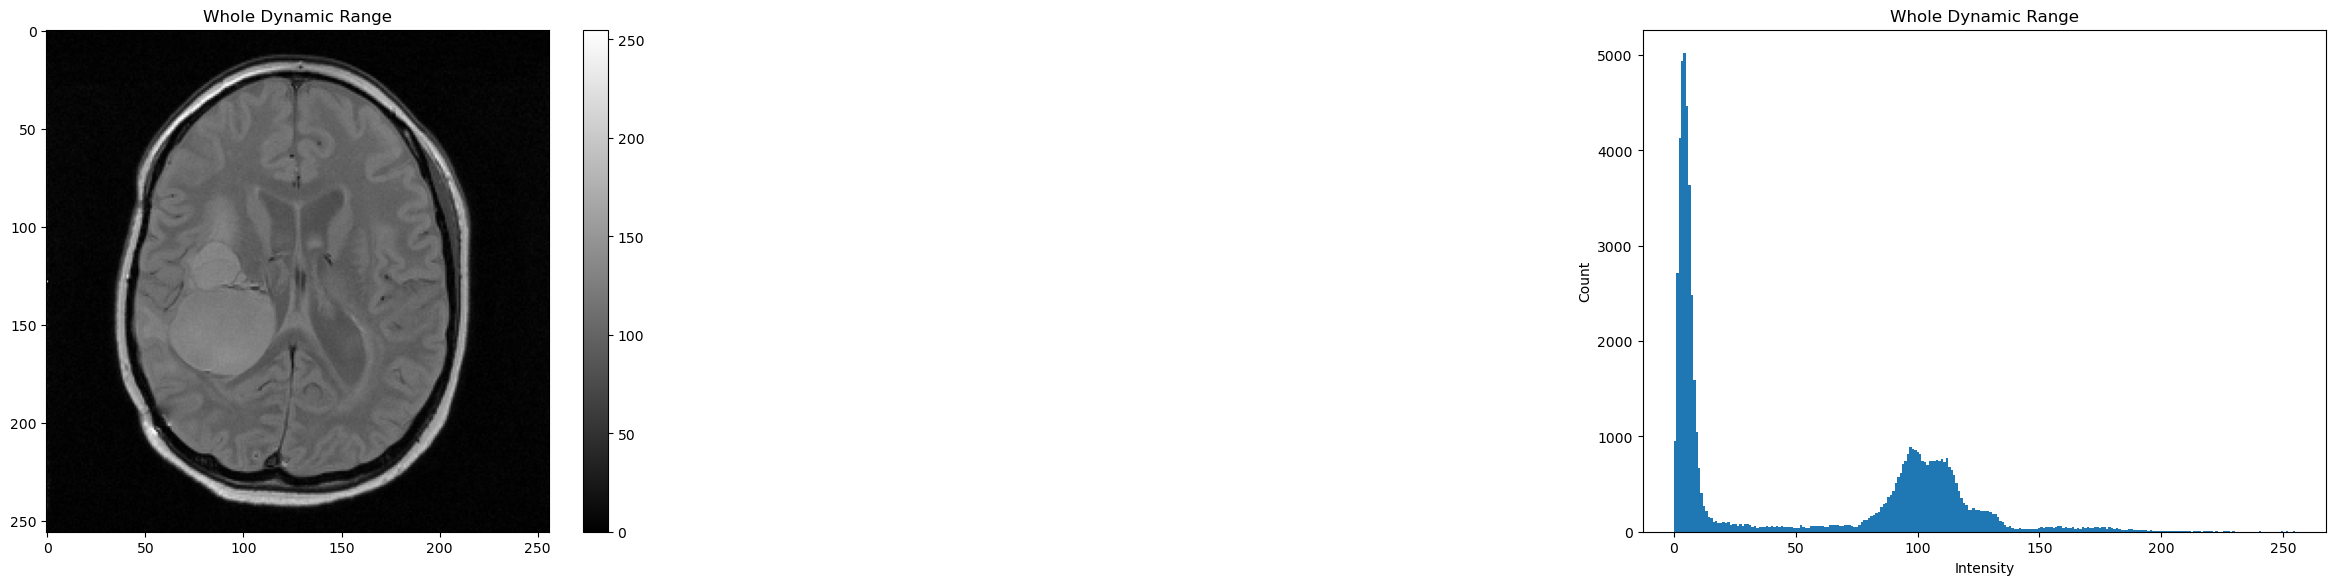

In [6]:
# Whole Dynamic Range Which has a Window value of 255 and Level value of 128
filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)
I = J
J = J.astype(np.float32)
# To Get Linear Transformation 
K = Linear_transform(255, 128, J).astype(np.uint8)
#Plot Titles
name = 'Whole Dynamic Range'
#Function To Plot
Plot_Line_Transform(J, name , 1, K)

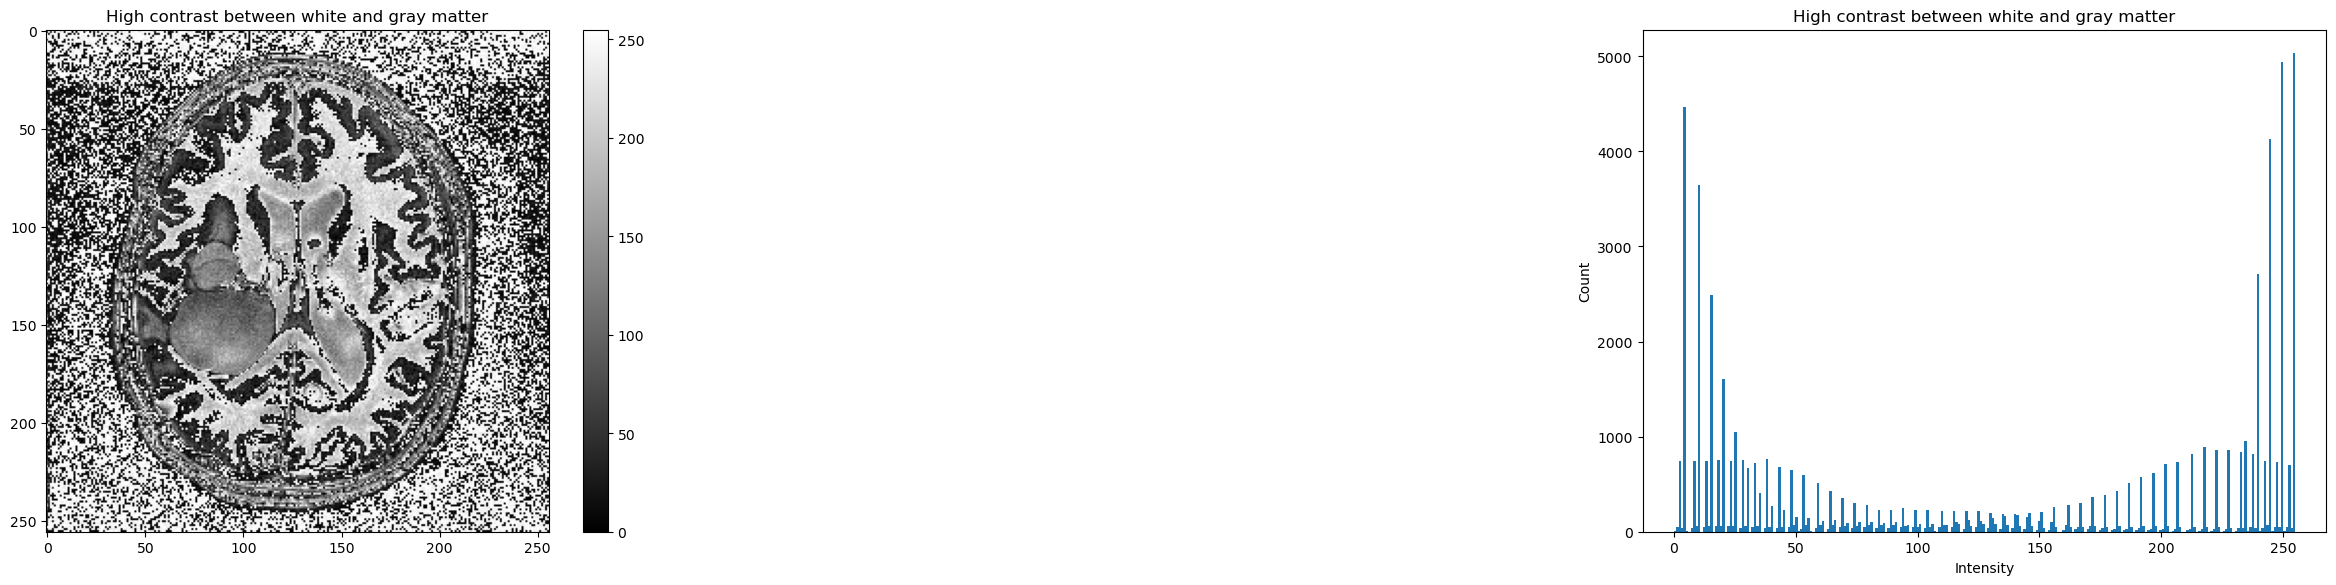

In [7]:
# High contrast between white and gray matter Which has a Window value
# of 50 and Level value of 50

# To Get Linear Transformation 
K = Linear_transform(50, 50, J).astype(np.uint8)
#Plot Titles
name = 'High contrast between white and gray matter'
#Function To Plot
Plot_Line_Transform(J, name , 2, K)


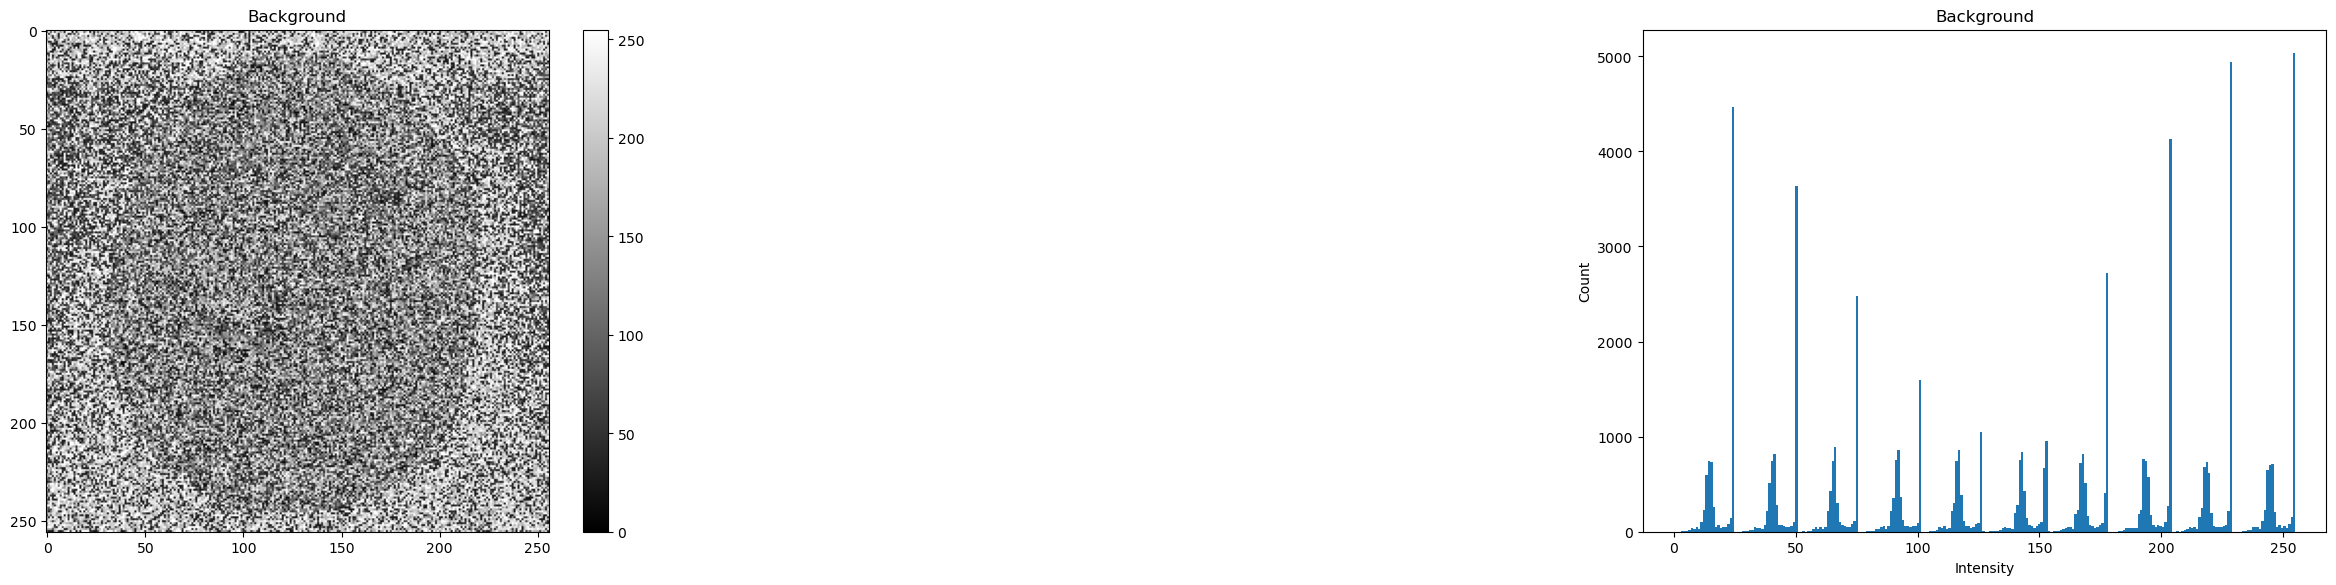

In [8]:
# Background Which has a Window value of 10 and Level value of 20

# To Get Linear Transformation 
K = Linear_transform(10, 20, J).astype(np.uint8)
#Plot Titles
name = 'Background'
#Function To Plot
Plot_Line_Transform(J, name , 3, K)

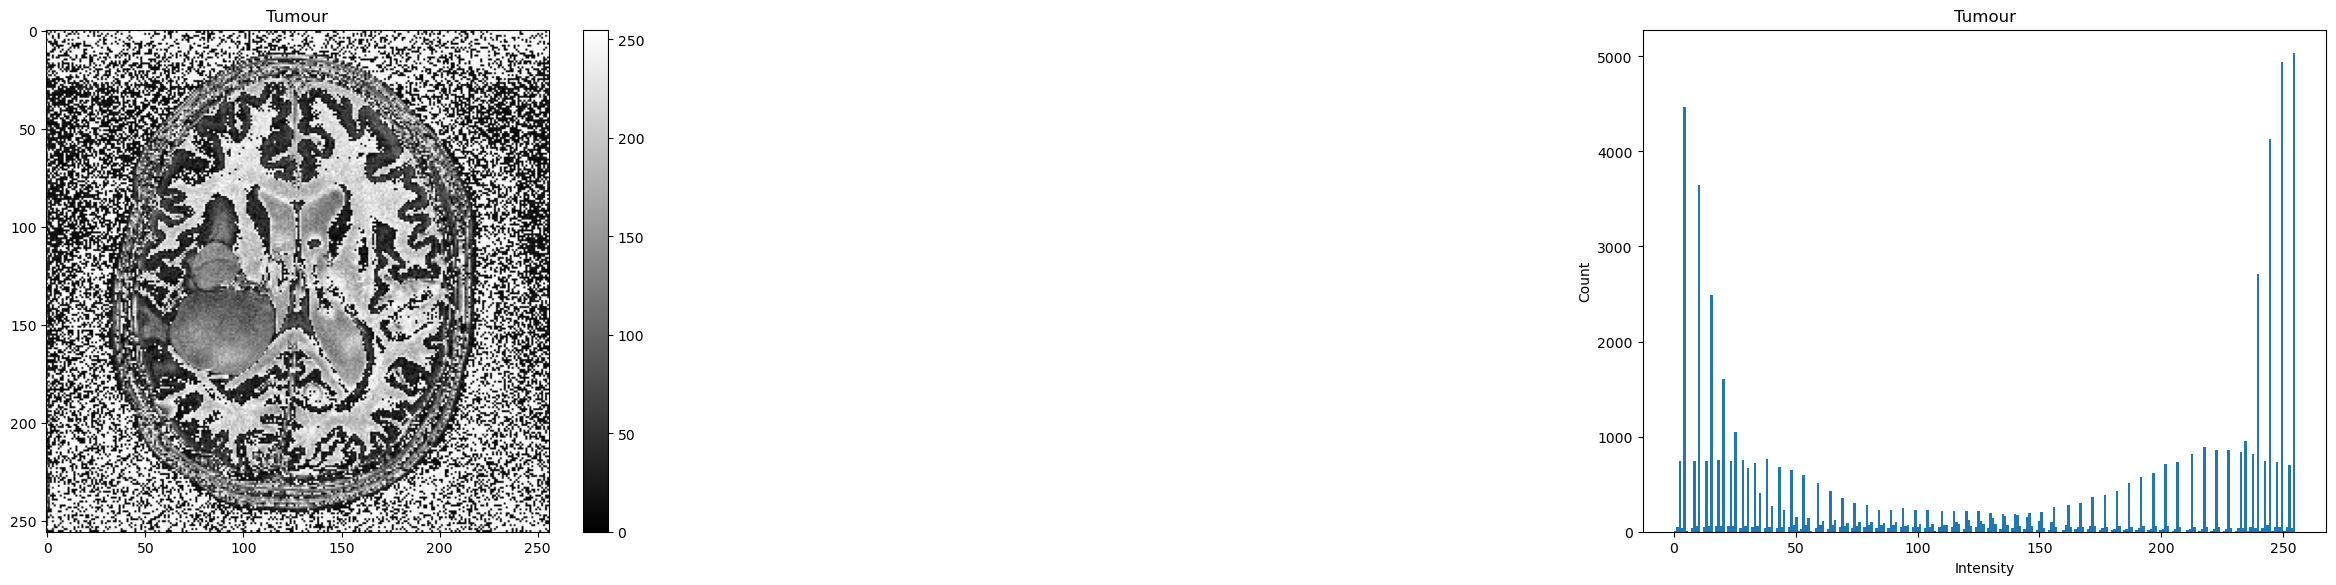

In [9]:
# Tumour has a Window value of 50 and Level value of 100

# To Get Linear Transformation 
K = Linear_transform(50, 100, J).astype(np.uint8)
#Plot Titles
name = 'Tumour'
#Function To Plot
Plot_Line_Transform(J, name , 4, K)

#### Stil Need to Work On for the Discussion Part

Compare the histogram of the second window level transformation (W=50, L=50) to the his-
togram of the first window level transformation (W=255, L=128). Which values were truncated
in the second window level transformation? In your own words, why does windowing and levelling
allow us to see different tissue




### Section 5 - Exploring a Gaussian Filter

Images Are 2D Object therefore the original Equation of:

(1/2π(σ^2))exp (-((y-yo)^2)/(2σ^2)) 

It would not work and need to use the 2D Transformation:

(1/2π(σ^2))exp (-(x^2 + y^2)/(2σ^2)) 

where x and y are the distance from the origin such that the equation would be (y-yo) and (x-yo)
which can be found here,

https://www.southampton.ac.uk/~msn/book/new_demo/gaussian/#:~:text=The%20Gaussian%20Smoothing%20Operator%20performs,defines%20the%20amount%20of%20blurring.
https://en.wikipedia.org/wiki/Gaussian_filter

In [10]:
# import math to get the exact value of pi
import math 


# (1/2π(σ^2))exp (-(x^2 + y^2)/(2σ^2)) Apply this on the Filter
def Gauss_Filter(kernel, sigma):
    #Have A Copy of the Kernel Size 
    matrix = kernel
    kernel = np.ones((matrix,matrix))
    # To get Base (1/2π(σ^2))
    base_denom = 2 * math.pi * math.pow(sigma,2)
    base = 1/base_denom
    # To get Exponant (-(x^2 + y^2)/(2σ^2))
    # Exponant Numerator
    for x in range(matrix):
        for y in range(matrix):
            exponant_num = 2 * (math.pow((x - (matrix/2)),2) + math.pow((y - (matrix/2)),2))
            exponant_denom = base_denom = -2 * math.pow(sigma,2)
            exp = exponant_num/exponant_denom
            kernel[x][y] = math.pow(sigma,2)
    return kernel    


def Display_Kernel(kernel,kernel_size, sigma, I):
    signal.convolve2d(I, kernel, boundary='pad', mode='same')
    print('Knee CT2 Scan for Kernel Size ', kernel_size, ', Sigma Value ', sigma)
    plt.imshow(I, cmap='gray')

    

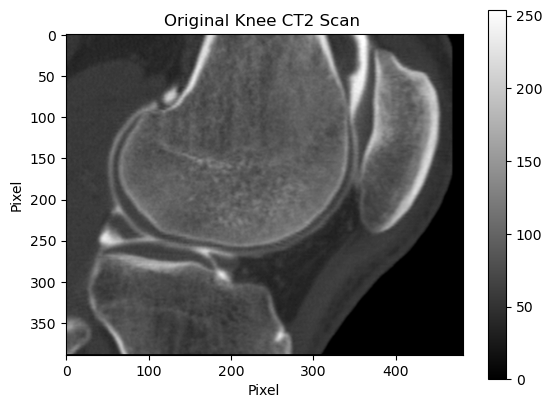

In [11]:
# Loading Image
filename = os.path.join(data_directory, 'knee_ct2.tif')

I = io.imread(filename)

# Display Image
plt.imshow(I, cmap='gray')
# Title, Axis, and Color Bar Added
plt.title("Original Knee CT2 Scan ")
plt.colorbar(); plt.xlabel('Pixel'); plt.ylabel('Pixel')
plt.show()

#### The Next 5 Following Images will have a Sigma Value of 2 and Kernel Values of 3, 5, 6, 21, 51

Knee CT2 Scan for Kernel Size  3 , Sigma Value  2


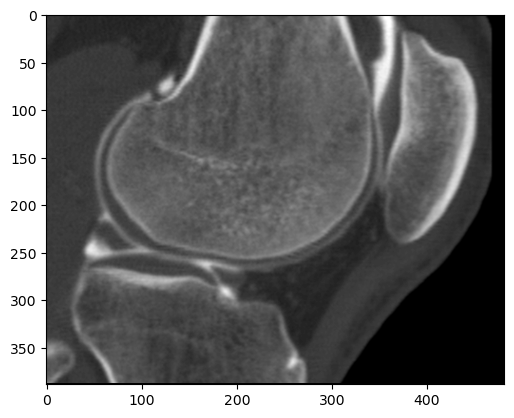

In [12]:
Kernel = Gauss_Filter(3, 2)
Display_Kernel(Kernel, 3, 2, I)

Knee CT2 Scan for Kernel Size  5 , Sigma Value  2


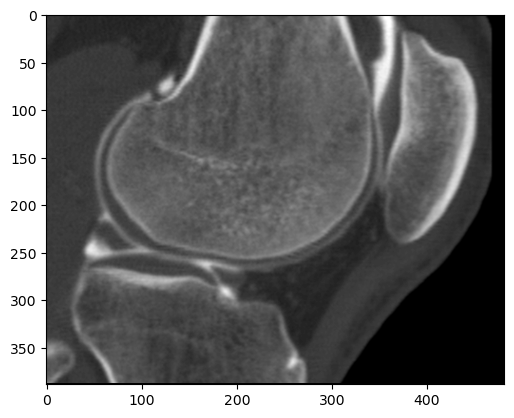

In [13]:
Kernel = Gauss_Filter(5, 2)
Display_Kernel(Kernel, 5, 2, I)

Knee CT2 Scan for Kernel Size  7 , Sigma Value  2


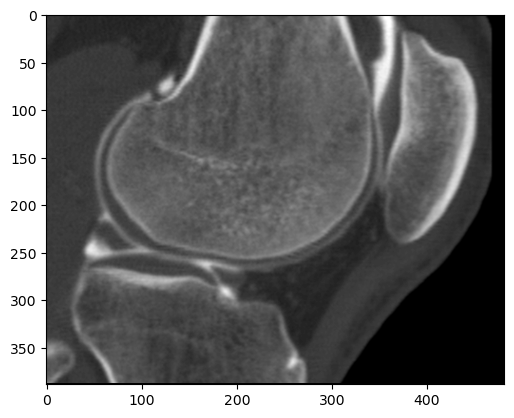

In [14]:
Kernel = Gauss_Filter(7, 2)
Display_Kernel(Kernel, 7, 2, I)

Knee CT2 Scan for Kernel Size  21 , Sigma Value  2


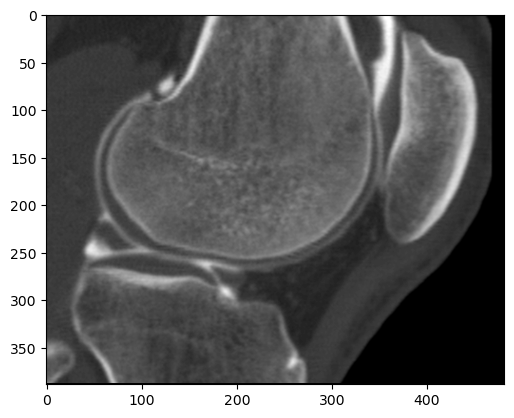

In [15]:
Kernel = Gauss_Filter(21, 2)
Display_Kernel(Kernel, 21, 2, I)

Knee CT2 Scan for Kernel Size  51 , Sigma Value  2


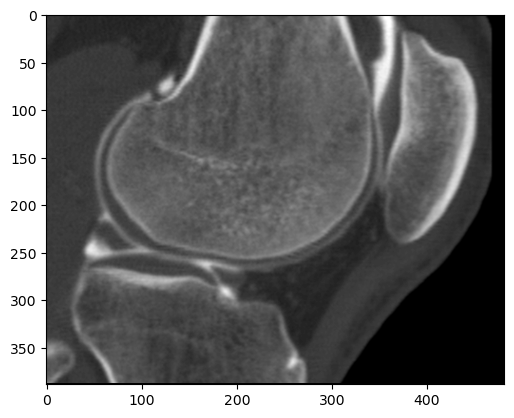

In [16]:
Kernel = Gauss_Filter(51, 2)
Display_Kernel(Kernel, 51, 2, I)

#### The Next 5 Following Images will have a Kernel Value of 21 and Sigma Values of 0.5, 1, 2, 3, 5

Knee CT2 Scan for Kernel Size  21 , Sigma Value  0.5


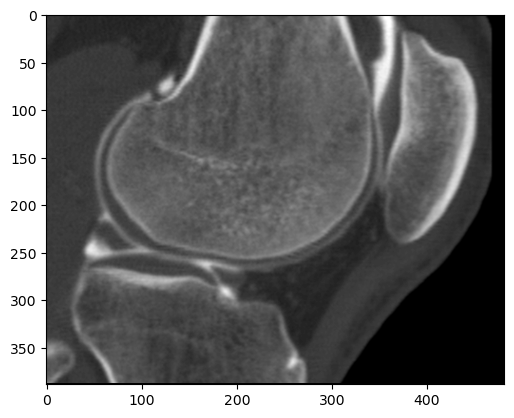

In [17]:
Sigma = Gauss_Filter(21, 0.5)
Display_Kernel(Sigma, 21, 0.5, I)

Knee CT2 Scan for Kernel Size  21 , Sigma Value  1


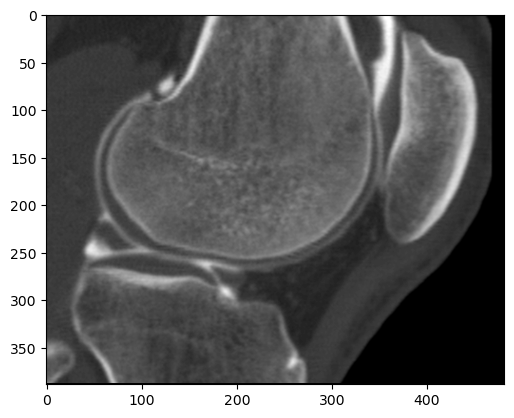

In [18]:
Sigma = Gauss_Filter(21, 1)
Display_Kernel(Sigma, 21, 1, I)

Knee CT2 Scan for Kernel Size  21 , Sigma Value  2


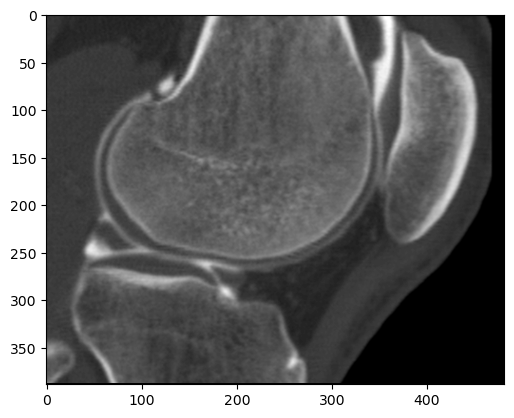

In [19]:
Sigma = Gauss_Filter(21, 2)
Display_Kernel(Sigma, 21, 2, I)

Knee CT2 Scan for Kernel Size  21 , Sigma Value  3


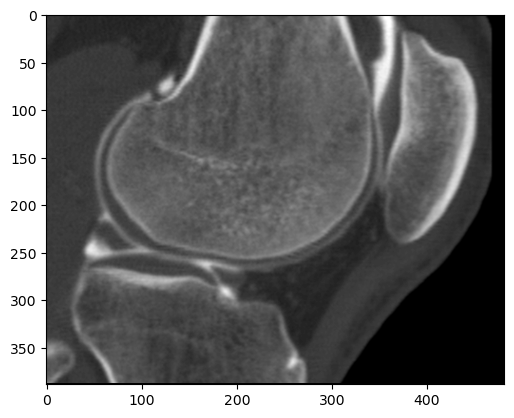

In [20]:
Sigma = Gauss_Filter(21, 3)
Display_Kernel(Sigma, 21, 3, I)

Knee CT2 Scan for Kernel Size  21 , Sigma Value  5


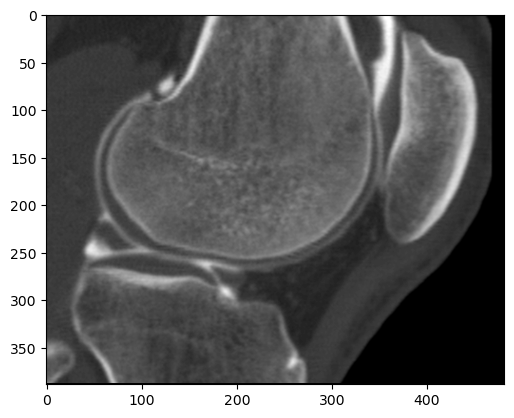

In [21]:
Sigma = Gauss_Filter(21, 5)
Display_Kernel(Sigma, 21, 5, I)

#### Stil Need to Work On for the Discussion Part

1. What is the effect of increasing the kernel size but keeping sigma const

2. What is the effect of increasing the sigma but keeping the kernel size constant?

3. Often a Gaussian filter is used to filter noise in an image. How should the parameters (sigma, kernel size) be chosen for filtering noise?

4. What is the disadvantage of making the kernel extremely large?



### Section 6 - Understanding Signal, Noise, and Contrast

#### Code To Get Point on the image
https://www.geeksforgeeks.org/plot-a-point-or-a-line-on-an-image-with-matplotlib/

In [57]:

# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage
import math 
import random
# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

#Add Salt Pepper
def add_sp(image, density):
    # Image Size since it is a perfect square
    size = int(math.sqrt(image.size))

    #Total Number of Pixels
    np = size * size

    #Get the total Amount of Pixels needed to be changed
    salt_pepper = int(np * density)
    


    salt_or_pepper = 0

    for o in range(salt_pepper):
        #Choose a Random X and Y Value based on the Dimensions and making sure the 
        #X and Y do not go past Image Matrix Boundry
        x = random.randint(0, size-1)
        y = random.randint(0, size-1)

        #Alterates between Black and White
        if salt_or_pepper == 0:
            #salt
            image[x,y] = 255 
            salt_or_pepper = 1
        elif salt_or_pepper == 1:
            #pepper
            image[x,y] = 0
            salt_or_pepper = 0


    return image

def add_Gauss_Noise(image, mean, variance):
    # This Function uses int or tuples of ints which is why you need to use .shape
    image = np.random.normal(mean, variance, image.shape)
    return image



def SNR_CNR(a_x, a_y, b_x, b_y, D):

    plt.plot(a_x, a_y, marker='.',markersize=20, color="red") 
    plt.plot(b_x, b_y, marker='.', markersize=20,color="#AEF309") #Hex Code for Color

    Mean_image = format(np.mean(D))

    Y = np.prod(D.shape)
    # For Signal to Noise Ratio
    SNR = format(np.mean(D)/(np.sqrt(Y / (Y-1) * np.std(D)**2))) #mean / sqrt(unbiased STD)  

    print('For Signal to Noise Ratio: ',SNR)
    D_a = D[a_y,a_x]
    D_b = D[b_y,b_x]

    # For Contrast to Noise Ratio
    #Conrast = |ia - ib|
    CNR = np.abs(D_a - D_b)/(np.sqrt(Y / (Y-1) * np.std(D)**2)) #Contrast / sqrt(unbiased STD)

    print('For Contrast to Noise Ratio: ',CNR)
    plt.imshow(D, cmap='gray') 
    plt.show() 


##### To Obtain The Formula for Gaussian Noise Used the Numpy Library and its predefined function for Gaussian Noise
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


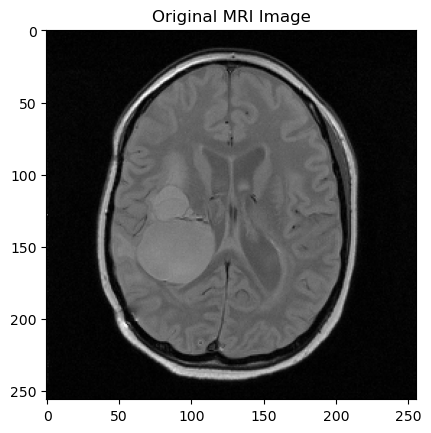

For Signal to Noise Ratio:  0.9980688283991731
For Contrast to Noise Ratio:  0.5239101896763823


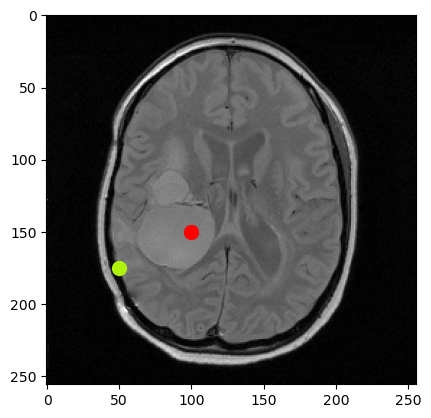

In [60]:

# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage
import math 
import random
# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

#     D_a = D[150,100]
#     D_b = D[175,50]

data_directory = os.path.join('.', 'Data')

filename = os.path.join(data_directory, 'mri_pd.tif')

J = io.imread(filename)
I = io.imread(filename)
size = int(math.sqrt(I.size))
J = add_sp(J, 0.1)

plt.imshow(I, cmap='gray'); plt.title('Original MRI Image')
plt.show()


SNR_CNR(100,150,50,175,I)





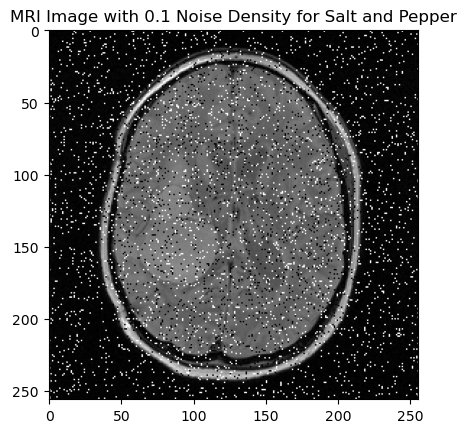

For Signal to Noise Ratio:  0.8896108253539223
For Contrast to Noise Ratio:  0.41260285579451134


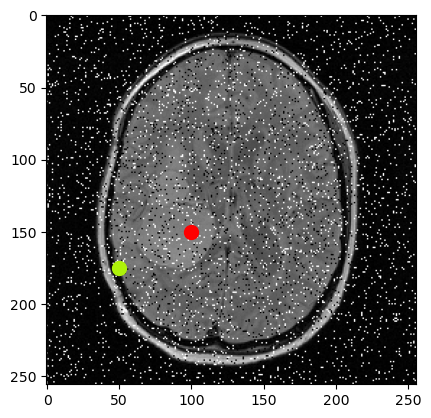

In [61]:
plt.imshow(J, cmap='gray'); plt.title('MRI Image with 0.1 Noise Density for Salt and Pepper')
plt.show()
SNR_CNR(100,150,50,175,J)

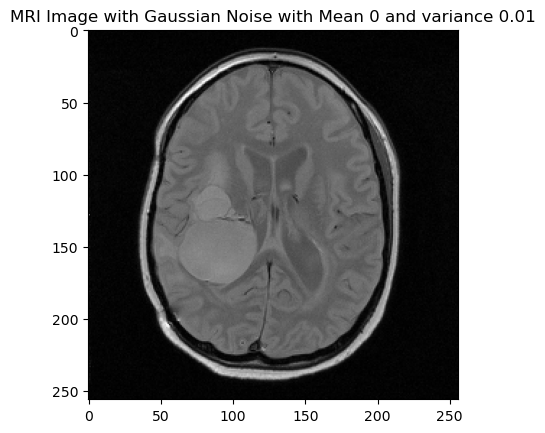

For Signal to Noise Ratio:  0.9980677791139163
For Contrast to Noise Ratio:  0.5234328404434132


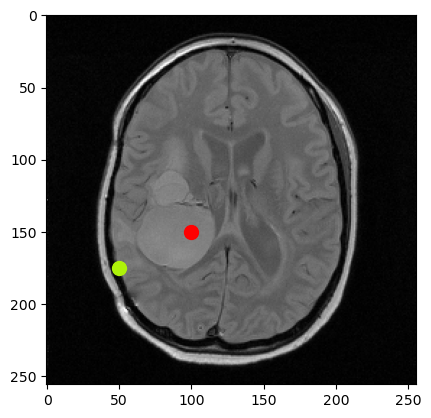

In [63]:
Gaussian_Noise = add_Gauss_Noise(I, 0, 0.01) 
Gaussian_Noise = I + Gaussian_Noise
plt.imshow(Gaussian_Noise, cmap='gray'); plt.title('MRI Image with Gaussian Noise with Mean 0 and variance 0.01')
plt.show()
SNR_CNR(100,150,50,175,Gaussian_Noise)

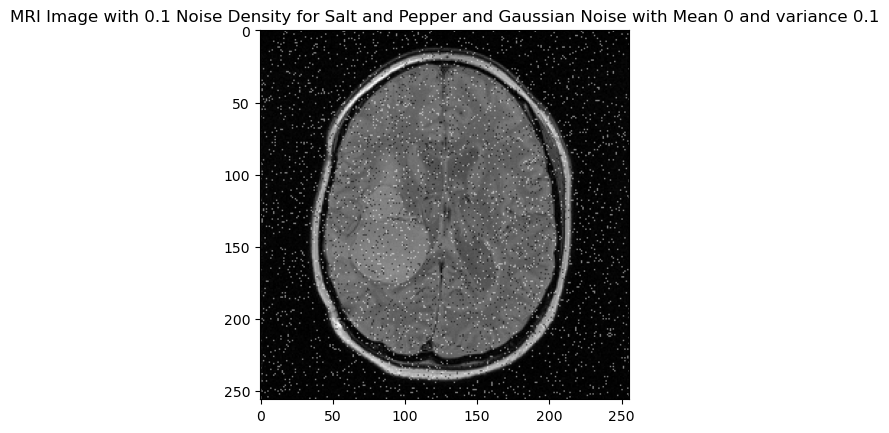

For Signal to Noise Ratio:  1.010670571409595
For Contrast to Noise Ratio:  0.49750190378345743


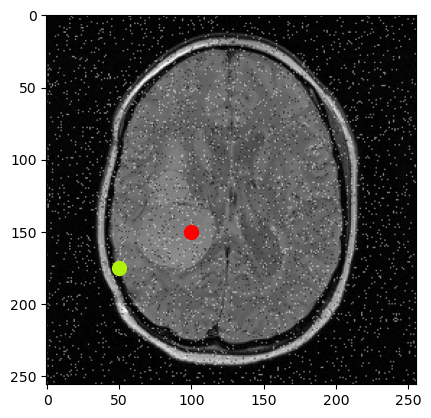

In [64]:
J_sp_gn = J + Gaussian_Noise

plt.imshow(J_sp_gn, cmap='gray'); plt.title('MRI Image with 0.1 Noise Density for Salt and Pepper and Gaussian Noise with Mean 0 and variance 0.1')
plt.show()
SNR_CNR(100,150,50,175,J_sp_gn)

##### To Obtain The Formula for Gaussian Filer Used the SciPy Library and its predefined function for Gaussian Filter
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html

#### To Obtain The Formula for Median Filter Used the SciPy Library and its predefined function for Median Filter

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt2d.html#scipy.signal.medfilt2d
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt2d.html

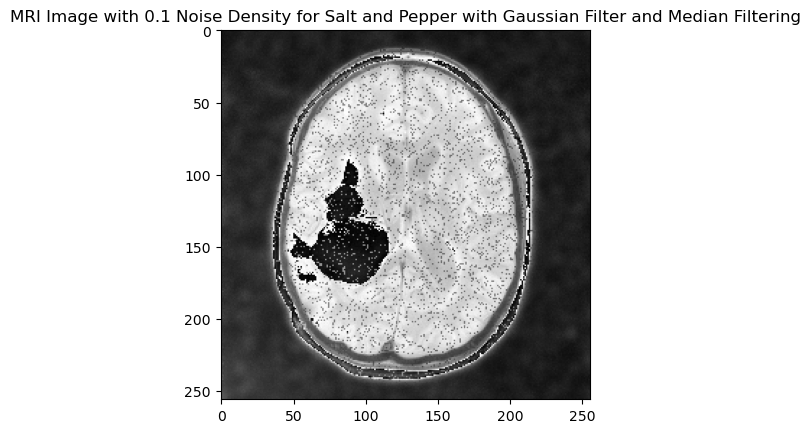

For Signal to Noise Ratio:  1.2613462755677067
For Contrast to Noise Ratio:  0.764886164404499


/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_1127/709679938.py:73: RuntimeWarning: overflow encountered in scalar subtract
  CNR = np.abs(D_a - D_b)/(np.sqrt(Y / (Y-1) * np.std(D)**2)) #Contrast / sqrt(unbiased STD)


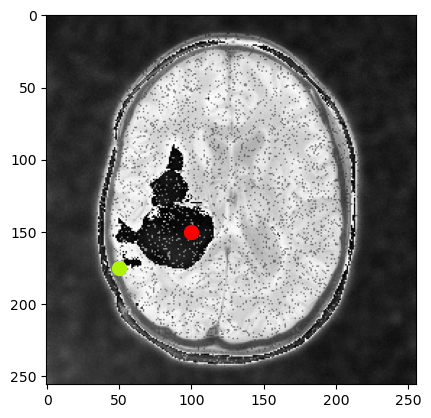

In [65]:
# Salt Pepper
from scipy.ndimage import gaussian_filter
from scipy import signal

result_gaus = gaussian_filter(J, sigma=3)
pop = result_gaus + J
snap = ndimage.median_filter(J, size)
crackle = snap + pop
plt.imshow(crackle, cmap='gray'); plt.title('MRI Image with 0.1 Noise Density for Salt and Pepper with Gaussian Filter and Median Filtering')
plt.show()
SNR_CNR(100,150,50,175,crackle)

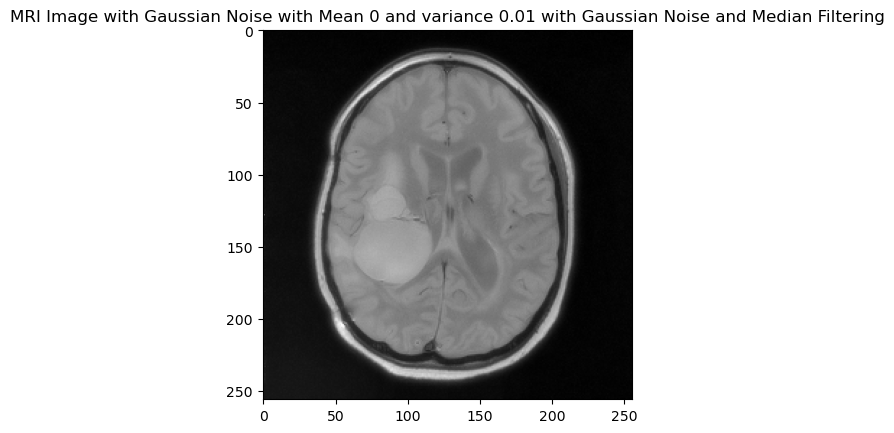

For Signal to Noise Ratio:  1.2520193899703975
For Contrast to Noise Ratio:  0.7357413717136867


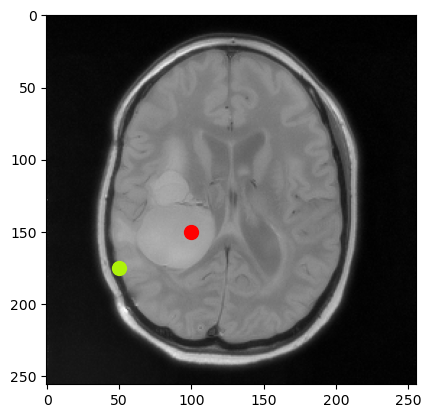

In [66]:
# Gaussian
from scipy.ndimage import gaussian_filter
from scipy import signal

result_gaus_gaus = gaussian_filter(Gaussian_Noise, sigma=3)
alpha = result_gaus_gaus + Gaussian_Noise
mega = ndimage.median_filter(Gaussian_Noise, size)
omega = alpha + mega
plt.imshow(omega, cmap='gray'); plt.title('MRI Image with Gaussian Noise with Mean 0 and variance 0.01 with Gaussian Noise and Median Filtering')
plt.show()
SNR_CNR(100,150,50,175,omega)

#### Stil Need to Work On for the Discussion Part

1. Qualitatively compare the original image to the Gaussian and salt and pepper noise images. What is the difference between Gaussian noise and salt and pepper noise?

2. Compare the median and Gaussian filtered salt and pepper noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?

3. Compare the median and Gaussian filtered Gaussian noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?

4. Does the best qualitative result always agree with the best numerical result? Why is it wise to visualize your images and not just rely on metrics?